# Learning outcomes
1. Gentle intro on CV
2. Review on some important notion of image arrays
3. Cropping (one of the data augmentation techniques employed in DL model training)
4. Split and merge image channels
5. Point Operator (basic mathematical operations) / gamma correction
   * Aims: Enhance / Reduce the contrast or illumination of the images. 
6. Image blending (add 2 images together)


# setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import show_img

## review: important concepts on image arrays
Images can be broadly categorized as **grayscale** and **color** images.

| Grayscale | Color|
| --- | --- |
| matrix (2D array) | 3D array (channels) |
| (h, w) | (h, w, channels) |

In [2]:
img = np.zeros((2, 4), dtype=np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
img[0, 1] = 30
img[1, 2] = 100
print(img)

[[  0  30   0   0]
 [  0   0 100   0]]


In [5]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[  0   0   0]
  [ 30  30  30]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


## Accessing pixel elements

In [6]:
img = cv.imread("images/lena.jfif")

a = img[50, 70, 0]
b = img.item(50, 70, 0)
a == b

True

In [7]:
%timeit a = img[50, 70, 0]  #recommended
%timeit b = img.item(50, 70, 0)

115 ns ± 4.82 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
108 ns ± 1.89 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


The takeaway the execution time is more or less the same. You are free to use either one of this.

## Numpy slicing

In [8]:
# Extract the top left region of the image
yc, xc = img.shape[0] // 2, img.shape[1] // 2

topleft = img[:yc, :xc] #img[0:yc, 0:xc]

show_img("topleft", topleft)

In [9]:
middle = img[yc-30:yc+30, xc-30:xc+30]

show_img("middle", middle)

In [10]:
# create a white image
white = np.zeros((200, 200)) + 255
white = np.uint8(white)

show_img("white", white)

## Exercise

In [11]:
# Q2: design pattern
patch = np.zeros((30, 30), dtype=np.uint8)

patch[:10, 10:20] = 255
patch[10:20, :10] = 255
patch[10:20, 20:] = 255
patch[20:, 10:20] = 255

img = np.tile(patch, (3, 3))

show_img("img", img)


In [12]:
# Q3: extract object of interest
img = cv.imread("images/dog.jfif")

show_img("img", img)

In [13]:
[i for i in dir(cv) if i.startswith('EVENT')]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [14]:
#1 way:
def select_rect(img, x, y, flags, params):
    """mouseclick callback function"""
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        cv.circle(img, (x, y), 1, (0, 0, 255), -1)
        cv.imshow("img", img)
        
img = cv.imread("images/dog.jfif")        
cv.imshow("img", img)
cv.setMouseCallback("img", select_rect)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

In [15]:
#2 way:
bbox = cv.selectROI('flower_region', img)

In [15]:
#3 way:
# top left coordinates: (91, 38) and bottom right coordinates: (170, 120)
flower = img[38:120, 91:170]

show_img("flower", flower)

## Image cropping

In terms of operations, it is identical to slicing.

In [19]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
n_vertical_grids = 3
n_horizontal_grids = 3

# row sizes and column sizes
M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1> h:
            x1 = w - 1
            x2 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
        
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)

show_img("crop", img_copy)

In [17]:
show_img("top right", tiles[2])

## Swapping regions (exercise)

In [18]:
# Q1
img_array = np.zeros_like(img)

yc, xc = img.shape[0] // 2, img.shape[1] // 2

img_array[:yc, :xc] =img[yc:, xc:]
img_array[yc:, xc:] = img[:yc, :xc]
img_array[yc:, :xc] = img[:yc, xc:]
img_array[:yc, xc:] = img[yc:, :xc]

show_img("swap", img_array)

In [2]:
# Q2
img = cv.imread("images/lena.jfif")

yc, xc = img.shape[0] // 2, img.shape[1] // 2

img[yc-30:yc+60, xc-30:xc+45] = 255

show_img("img", img)

## Split and merge color channels

In [19]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

In [20]:
np.array_equal(img, img_merge)

True

In [3]:
import matplotlib.pyplot as plt

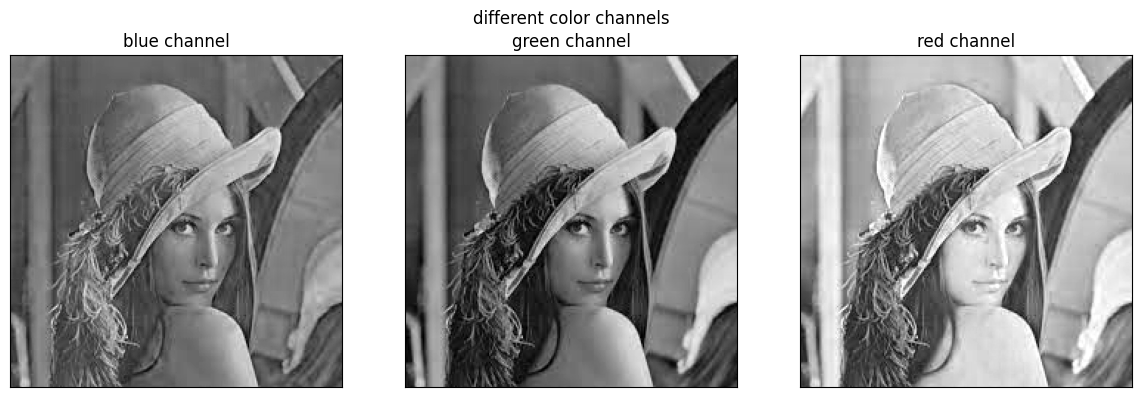

In [22]:
img = cv.imread("images/lena.jfif")

b, g, r = cv.split(img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("different color channels")
ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

### Exercise no 2: color channels

In [23]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)

colors = ("blue", "green", "red")

imgs = []
for i, mat in enumerate(channels):
    arr = np.zeros_like(img)
    arr[:, :, i] = mat
    imgs.append(arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
$$f_{trans}(\textbf{x}) = \alpha f({x}) + \beta$$

In [24]:
np.array([-2, 0, 99, 260], dtype=np.uint8)

C:\Users\Acer\AppData\Local\Temp\ipykernel_7344\2268900648.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([-2, 0, 99, 260], dtype=np.uint8)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7344\2268900648.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 260 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([-2, 0, 99, 260], dtype=np.uint8)


array([254,   0,  99,   4], dtype=uint8)

In [25]:
def point_op(img, alpha, beta):
    """point operators. Arguments
    1. Source images
    2. multiplier
    3. constant"""
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    res = np.uint8(res)
    return res

In [26]:
# increase the brightness and contrast of image
img = cv.imread("images/bridge.jfif")

transform = point_op(img, 2, 30)

cv.imshow("original", img)
show_img("transform", transform)

In [28]:
# decrease the brightness
transform2 = point_op(img, 0.8, -20)

cv.imshow("original", img)
show_img("img_transform", transform2)

## Gamma correction
$$O = (\frac{I}{255})^{\gamma} \times 255$$

In [29]:
gamma = 1 / 2.2

lookupTable = np.empty((1, 256), dtype=np.uint8)
for i in range(256):
    lookupTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookupTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma corrected", res, adjust= True)

## Image blending (add 2 images)
$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [28]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.6
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("img1", img)
cv.imshow("img2", img2)
show_img("blending", res)

## Weekly activity

## Q1

<function matplotlib.pyplot.show(close=None, block=None)>

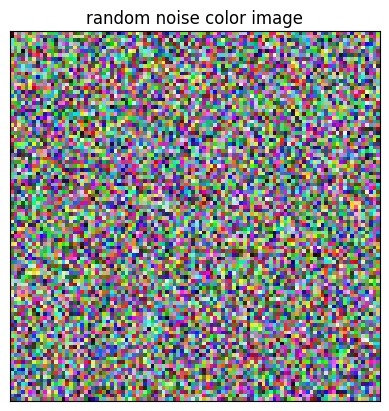

In [4]:
# Q1
# random noise color image
noise_color_img = np.random.randint(0, high=256, size=(100, 100, 3), dtype=np.uint8)

plt.imshow(noise_color_img)
plt.title("random noise color image")
plt.xticks([]), plt.yticks([])
plt.show

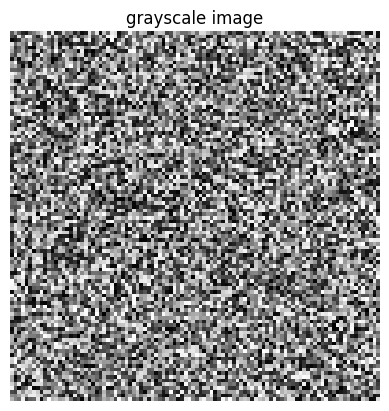

In [5]:
#grayscale image
def random_grayscale():
    return np.random.randint(0, 256)

grayscale_image = np.zeros((100, 100), dtype=np.uint8)
for y in range(100):
    for x in range(100):
        grayscale_image[y, x] = random_grayscale()

plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.title('grayscale image')
plt.show()

## Q2

In [6]:
# Q2
img = cv.imread("images/dog.jfif")

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()

    h, w = img.shape[:2]
    n_vertical_grids = 3
    n_horizontal_grids = 3

    # row sizes and column sizes
    M = int(h / n_vertical_grids)
    N = int(w / n_horizontal_grids)

    tiles = []

    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M
        
            if x1 > w and y1> h:
                x1 = w - 1
                x2 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)
        
            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)
            
            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)  
                
    show_img("crop", img_copy)
            
crop_grid(img, 3, 3, (255, 0, 0))

## Q3

In [7]:
# Q3
def smooth_transition_images(img, img2, alpha):
    return cv.addWeighted(img, alpha, img2, 1 - alpha, 0)

img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.6
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# Define the number of steps and generate image sequences
num_steps = 20
alpha_values = np.linspace(0, 1, num_steps)

# Create and save the image sequences
for i, alpha in enumerate(alpha_values):
    blended_image = smooth_transition_images(img, img2, alpha)
    cv.imshow("Smooth Transition", blended_image)
    cv.waitKey(200)  # Adjust the time (in milliseconds) between each frame
    
cv.destroyAllWindows()

## Q4

In [8]:
# Q4
from PIL import Image, ImageDraw, ImageFont

def apply_watermark(input_image_path, output_image_path, watermark_text):
    # Open the input image
    image = Image.open(input_image_path)

    # Create a copy of the image to apply the watermark on
    watermarked_image = image.copy()

    # Set the watermark text and font properties
    text = watermark_text
    font = ImageFont.truetype("arial.ttf", 150)  

     # Calculate the position to place the watermark (bottom left corner)
    text_width, text_height = font.getsize(text)
    margin = 200  # Set the desired margin from the bottom and left edges
    x = margin
    y = image.height - text_height - margin 

    # Create a drawing context
    draw = ImageDraw.Draw(watermarked_image)

    # Apply the watermark by drawing the text on the image
    draw.text((x, y), text, font=font)

    # Save the watermarked image
    watermarked_image.save(output_image_path)

    print("Watermark applied successfully.")

apply_watermark("images/travel_hd.jpg", "images/travel_hd_watermarked.jpg", "CV lab UCCC2513")

Watermark applied successfully.


C:\Users\Acer\AppData\Local\Temp\ipykernel_9388\3927525621.py:16: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_width, text_height = font.getsize(text)
